### Introduction
This project is an anomaly detection prediction model that predicts if a booking is fraudulent or not. Anomaly detection can be a supervised or unsupervised classification problem. However, for this project we will be treating it as a superised classification problem. This is because we have a target variable.
We will use the Random Forest Classifier and one or more advanced model.

### Objectives
- Analyse provided data
- Ensure data is cleaned e.g column object match, handling missing values, outlier detection
- Perform data exploration to detect patterns
- Engineer new features that will be used to train the model
- Build model with final features

### Data
The data provided is in a csv format and contains about 3 million rows with 29 columns.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [6]:
df = pd.read_csv('data.csv')

In [7]:
df.head()

,bid,channel,createdon,cust_name,date_of_birth,email,email_domain_score,email_score,godate,insurance_flg,...,payer_name,proxy,recent_abuse,role_id,seats,tor,useragent,usr_name,vehclass_id,vpn
0,6524445,affiliate,2021-05-01 00:21:17+07:00,Tiffany Stephenson,1999-07-04,ryanbrianna@outlook.com,0.0,10.0,2021-07-01 07:30:00+07:00,0,...,Tiffany Stephenson,NaN,NaN,user,1,NaN,"Phone,sv,SEK",Tiffany Stephenson,van,NaN
1,5800338,affiliate,2021-05-01 00:30:19+07:00,Amanda Cooper,2002-06-07,dustin85@gmail.com,0.0,10.0,2021-05-29 13:35:00+07:00,1,...,NaN,0.0,0.0,user,1,0.0,"Phone,en,PHP",Amanda Cooper,avia,0.0
2,7897646,direct,2021-05-01 01:09:12+07:00,Victoria Cortez,NaN,johnny40@gmail.com,0.0,2.0,2021-05-10 10:40:00+07:00,1,...,Victoria Cortez,NaN,NaN,user,2,NaN,"Phone,de,THB",Victoria Cortez,avia,NaN
3,7644834,direct,2021-05-01 01:29:33+07:00,Victoria Cortez,1995-08-02,johnny40@gmail.com,0.0,2.0,2021-05-10 12:00:00+07:00,1,...,Victoria Cortez,NaN,NaN,user,2,NaN,"Phone,de,THB",Victoria Cortez,bus,NaN
4,7462960,NaN,2021-05-01 01:36:36+07:00,Francisco Wagner,1989-01-16,margaretcastaneda@gmail.com,0.0,5.0,2021-05-02 10:33:00+07:00,1,...,NaN,0.0,0.0,user,1,0.0,"Phone,en,MYR",Francisco Wagner,train,0.0


### Data Exploration

In [8]:
df.columns

Index(['bid', 'channel', 'createdon', 'cust_name', 'date_of_birth', 'email',
       'email_domain_score', 'email_score', 'godate', 'insurance_flg', 'ip',
       'isFraud', 'nationality', 'netprice_thb', 'p_attempts', 'paidon',
       'passenger_passport_score', 'passenger_score', 'payer_country',
       'payer_name', 'proxy', 'recent_abuse', 'role_id', 'seats', 'tor',
       'useragent', 'usr_name', 'vehclass_id', 'vpn'],
      dtype='object')

In [9]:
missing_values = df.isnull().sum()
fraud_counts = df["isFraud"].value_counts(normalize=True) * 100
numerical_columns = ["email_domain_score", "email_score", "netprice_thb", "p_attempts", "passenger_passport_score","passenger_score"]
summary_stats = df[numerical_columns].describe()


In [10]:
summary_stats

,email_domain_score,email_score,netprice_thb,p_attempts,passenger_passport_score,passenger_score
count,3.464222e+06,3.464222e+06,3.464222e+06,3.464222e+06,3.464222e+06,3.464222e+06
mean,1.905190e-04,3.341505e+00,7.416636e+02,1.117096e-01,5.950254e-02,1.243714e-01
std,7.560115e-02,3.929717e+00,2.474322e+04,5.732293e-01,1.334742e+00,2.947970e+00
min,0.000000e+00,0.000000e+00,-4.836959e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,2.600000e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.000000e+00,4.800000e+02,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,5.000000e+00,8.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00
max,3.000000e+01,1.000000e+01,1.731993e+07,1.440000e+02,3.000000e+01,7.000000e+01


In this summary, we do not see ridiculous outliers, except for the passenger_score which has a minimum of 0 and a maximum of 70. Further investigation shows that these are the only available values in the column.
It will be interesting to see if there are any weird ages, this we will investigate later in the notebook.

In [11]:
missing_values, fraud_counts

(bid                               0
 channel                      118148
 createdon                         0
 cust_name                         1
 date_of_birth                 35196
 email                             0
 email_domain_score                0
 email_score                       0
 godate                            0
 insurance_flg                     0
 ip                              232
 isFraud                           0
 nationality                      41
 netprice_thb                      0
 p_attempts                        0
 paidon                            0
 passenger_passport_score          0
 passenger_score                   0
 payer_country                    74
 payer_name                  1296718
 proxy                       1708481
 recent_abuse                1708481
 role_id                           0
 seats                             0
 tor                         1708481
 useragent                       232
 usr_name                       5045
 

We can see that there are some columns with missing values. We cannot just drop the missing values as there are a lot and might lead to missing information. 

There are also some important information on the mising values which might point to fraudulent activities. For example, a missing date of birth might be a sign of fraud.
Filling the values, on the one hand, might be tricky. Deciding to fill the values based on mode in the case of tor needs to be done carefully, because of this we will leaving the filling of missing values for later. We will first explore the data and check if there are any relationships in column, e.g is there a correlation in tor users and proxy or vpn? That way we might decide on how to fill the values. 

Let's explore our data and see what we might find.

/var/folders/tw/ndq1jgcx2wd24k_lfzh73pcm0000gn/T/ipykernel_24314/2750005050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='coolwarm')


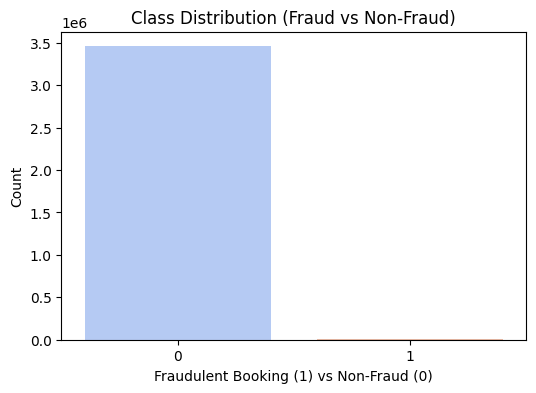

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df, palette='coolwarm')
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Fraudulent Booking (1) vs Non-Fraud (0)")
plt.ylabel("Count")
plt.show()

We can see some imbalance in the target data which is likely as there should more non-fraudulent activities.

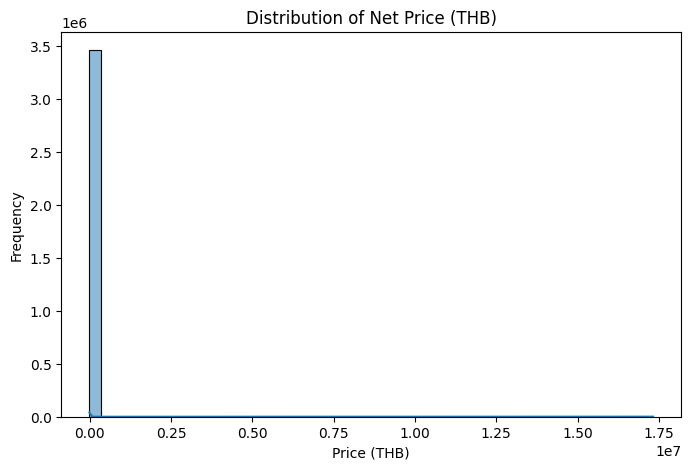

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['netprice_thb'], bins=50, kde=True)
plt.title("Distribution of Net Price (THB)")
plt.xlabel("Price (THB)")
plt.ylabel("Frequency")
plt.show()

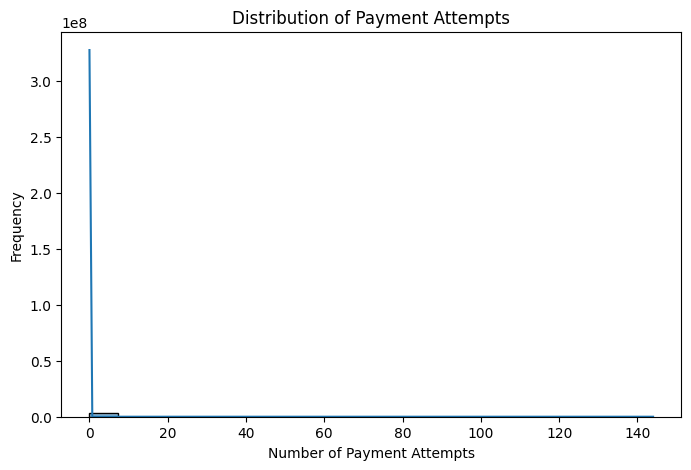

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['p_attempts'], bins=20, kde=True)
plt.title("Distribution of Payment Attempts")
plt.xlabel("Number of Payment Attempts")
plt.ylabel("Frequency")
plt.show()

The distribution of payment attempts could also point to fraudulent activities as more payment attempts could mean that there are attempts to bypass some security.

/var/folders/tw/ndq1jgcx2wd24k_lfzh73pcm0000gn/T/ipykernel_24314/3073300802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='channel', data=df, order=df['channel'].value_counts().index, palette='viridis')


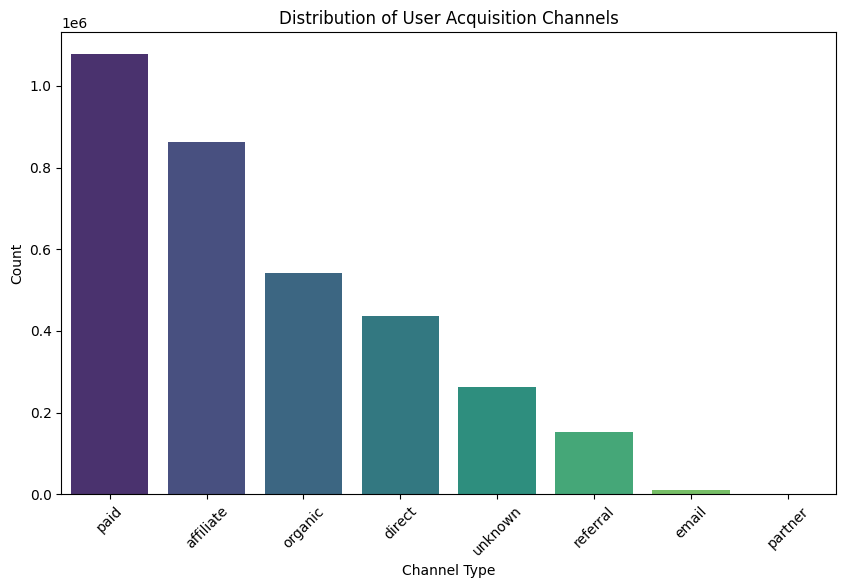

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='channel', data=df, order=df['channel'].value_counts().index, palette='viridis')
plt.title("Distribution of User Acquisition Channels")
plt.xticks(rotation=45)
plt.xlabel("Channel Type")
plt.ylabel("Count")
plt.show()

Lots of users are acquired through paid, affiliate, organics and direct channels

/var/folders/tw/ndq1jgcx2wd24k_lfzh73pcm0000gn/T/ipykernel_24314/437776681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='proxy', data=df, ax=axes[0], palette='coolwarm')
/var/folders/tw/ndq1jgcx2wd24k_lfzh73pcm0000gn/T/ipykernel_24314/437776681.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vpn', data=df, ax=axes[1], palette='coolwarm')


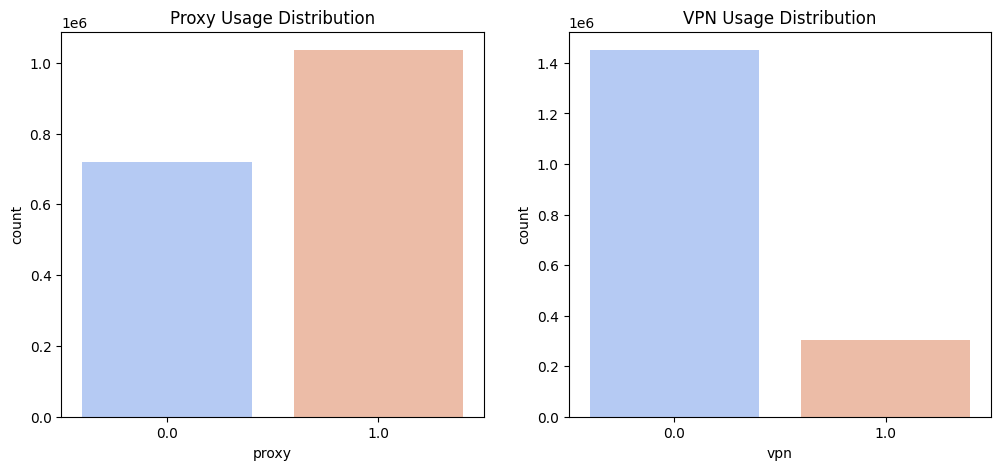

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='proxy', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title("Proxy Usage Distribution")
sns.countplot(x='vpn', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title("VPN Usage Distribution")
plt.show()


The above plot is to see if there are any relationships between proxy amd vpn users. Although, there are more proxy users than vpn users, however, this does not point directly to fraudulent activities as users might use proxy or vpn to find cheaper tickets.

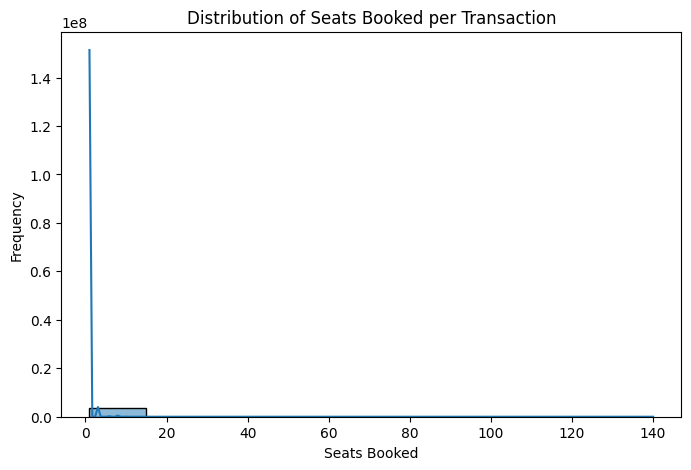

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['seats'], bins=10, kde=True)
plt.title("Distribution of Seats Booked per Transaction")
plt.xlabel("Seats Booked")
plt.ylabel("Frequency")
plt.show()

Large seat bookings as seen above might indicate an unusual fraud pattern, however, it could also be due to group bookings as well.

Now we investigate age and age groups. Basically checking if there are any outliers or relationships between age groups and fraud. We also try to see if there is any relationship between missing date of birth and fraud.

In [18]:
print("Missing Date of Birth:", df['date_of_birth'].isna().sum())

print(df.groupby(df['date_of_birth'].isna())['isFraud'].mean())


Missing Date of Birth: 35196
date_of_birth
False    0.002064
True     0.021252
Name: isFraud, dtype: float64


In [19]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
df_dob = df.copy()
df_dob["date_of_birth"].fillna(df_dob["date_of_birth"].mode()[0], inplace=True)
df_dob['age'] = df_dob['date_of_birth'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)
#print(df_dob[['date_of_birth', 'age']].head())

/var/folders/tw/ndq1jgcx2wd24k_lfzh73pcm0000gn/T/ipykernel_24314/4088579156.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dob["date_of_birth"].fillna(df_dob["date_of_birth"].mode()[0], inplace=True)


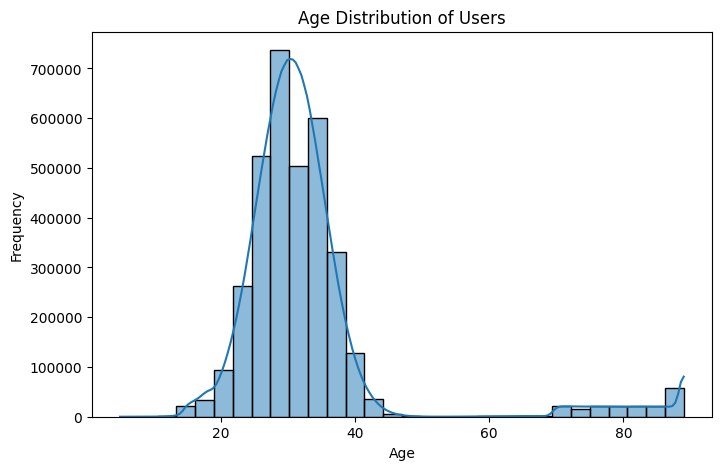

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df_dob['age'], bins=30, kde=True)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

We can see that there are more young users and likely outliers in the age beyond 90+.

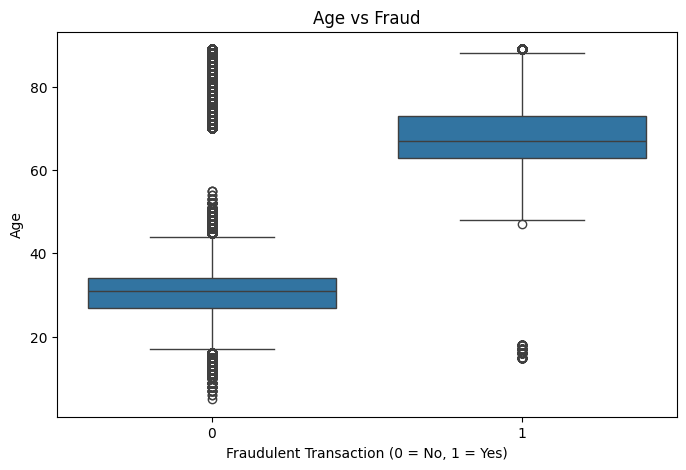

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='age', data=df_dob)
plt.title("Age vs Fraud")
plt.xlabel("Fraudulent Transaction (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

There is age difference between fraudulent and non-Fraudulent transactions.
Non-fraudulent transactions tend to be younger users with ages concentrated between 20 and 40.
Fraudulent transactions (1 on x-axis) are significantly older on average, with the median age appearing between 60 and 70.

As mentioned earlier, there's an outlier at around 90 years old in both groups, which might be as a result of some synthetic data.

Fraud seems to be associated with older individuals, which could mean older individuals might be victims of scams, fake identities or synthetic fraud where scammers use fake DOBs.
The presence of some young fraudsters suggests that age alone is not a perfect fraud indicator but could be a strong feature in the fraud detection model.

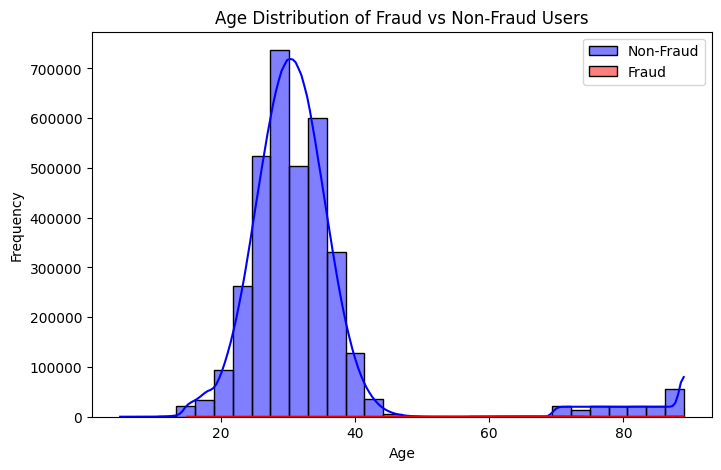

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df_dob[df_dob['isFraud'] == 0]['age'], bins=30, kde=True, label="Non-Fraud", color='blue')
sns.histplot(df_dob[df_dob['isFraud'] == 1]['age'], bins=30, kde=True, label="Fraud", color='red')
plt.legend()
plt.title("Age Distribution of Fraud vs Non-Fraud Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

This confirms some of the observations mentioned above.

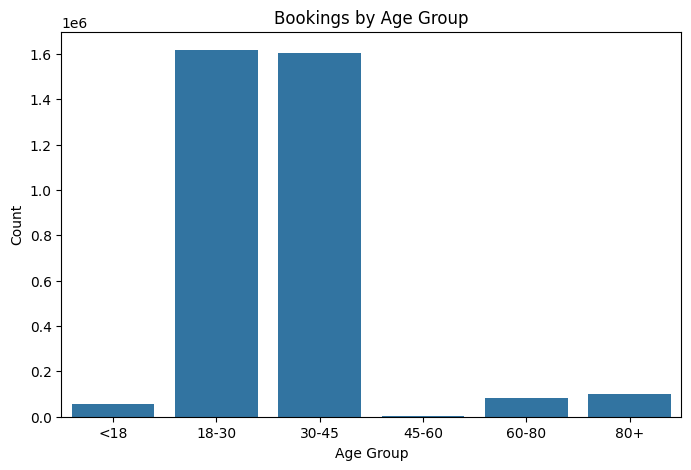

In [23]:
bins = [0, 18, 30, 45, 60, 80, 100]
labels = ['<18', '18-30', '30-45', '45-60', '60-80', '80+']
df_dob['age_group'] = pd.cut(df_dob['age'], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.countplot(x='age_group', data=df_dob, order=labels)
plt.title("Bookings by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


In order to decide how to fill missing values, we try to see if we can fill the values using both columns. And if there are no relationships we just fill them with other methods

In [24]:
correlation = df[['vpn', 'tor']].corr()
print(correlation)

          vpn       tor
vpn  1.000000  0.029514
tor  0.029514  1.000000


There are no relationships, hence we can imply one from the other.

/var/folders/tw/ndq1jgcx2wd24k_lfzh73pcm0000gn/T/ipykernel_24314/200583094.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="proxy", y="isFraud", data=df, ci=None)


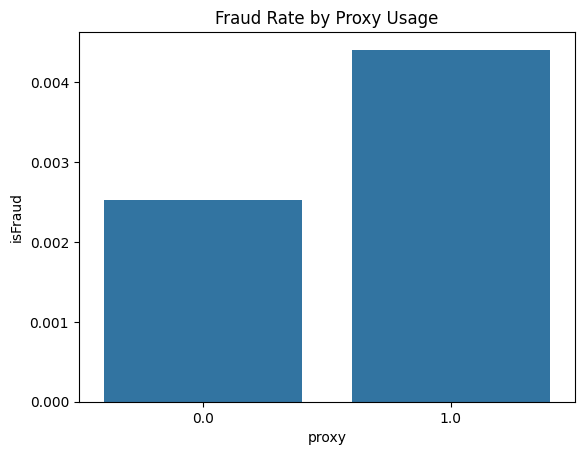

In [25]:
sns.barplot(x="proxy", y="isFraud", data=df, ci=None)
plt.title("Fraud Rate by Proxy Usage")
plt.show()

We can see that the proxy alone might not be an indicator of fraud as mentioned earlier, people might use proxy when booking for various reasons such as not browser cookies avoidance, cheaper rates etc.

/var/folders/tw/ndq1jgcx2wd24k_lfzh73pcm0000gn/T/ipykernel_24314/1581005807.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="tor", y="isFraud", data=df, ci=None)


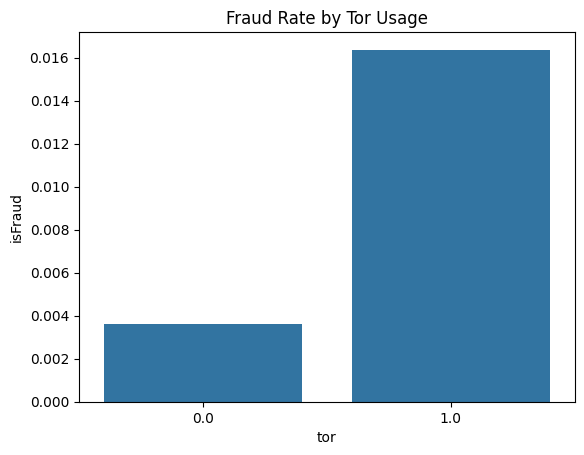

In [26]:
sns.barplot(x="tor", y="isFraud", data=df, ci=None)
plt.title("Fraud Rate by Tor Usage")
plt.show()

At the same that we see here that most tor users have higher fraud rate, hence this could be a good indicator of fraud detection.

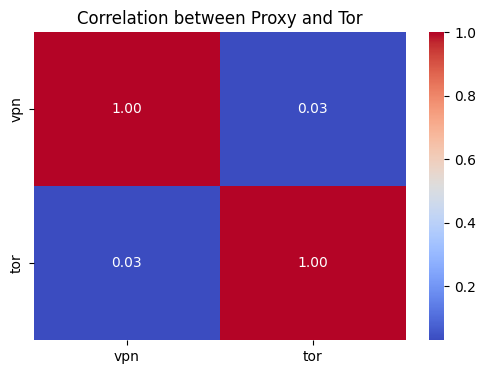

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Proxy and Tor")
plt.show()

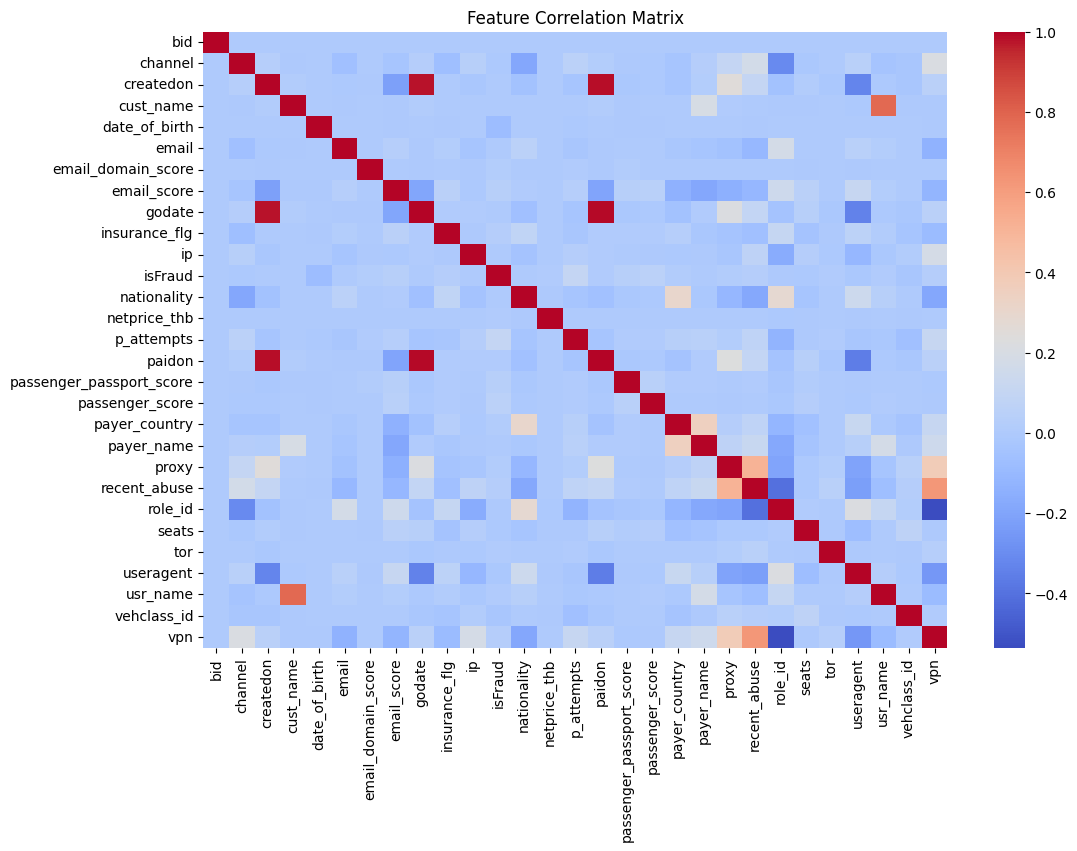

In [28]:
# We try to check for correlation
df_corr = df.copy()
categorical_columns = df_corr.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_columns:
    df_corr[col] = encoder.fit_transform(df_corr[col])

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

There is strong correlation between:
- paidon and createdon, which could mean that most customers paid on the same date as when the booking was created
- Some customers also created bookings on the go date, could be last minute booking
- user name and customer name are mostly the same, so it will be good to see cases when they is a mismatch as that may indicate fraud.

Overall we can see few strong correlations in ths data, we will now see how we can use this correlation for feature engineering. 

### Handling missing values

In [29]:
df['age'] = 2024 - df['date_of_birth'].dt.year
df['dob_missing'] = df['date_of_birth'].isna().astype(int)
df.drop(columns=['date_of_birth'], inplace=True)

#Handling missing values
df.fillna({
    "channel": "unknown",
    "proxy": df["proxy"].mode()[0] if not df["proxy"].mode().empty else 0, 
    "recent_abuse": df["recent_abuse"].mode()[0] if not df["recent_abuse"].mode().empty else 0,
    "payer_name": "unknown",
    "role_id": "unknown",
    "age": df["age"].median(),
    "vpn": df["vpn"].mode()[0] if not df["vpn"].mode().empty else 0,
    "tor": df["tor"].mode()[0] if not df["tor"].mode().empty else 0
}, inplace=True)

In [30]:
df.dropna(inplace=True)

### Feature Engineering

Here we try to engineer columns that might help the model. Since we have clean our data, explored it and handled missing values, we can then move to model building. Most of the columns cannot be used as they are in the model as that might lead to complexity and overfitted model. For example, we cannot use raw names or countries directly in the model but we can engineer some features.
We will look at mismatch in some columns like the payer name and customer name, mismatch in payer and customer countries, also how frequent a customer account appears in fraud and some price anomaly relating to the netprice_thb.
We would also use the time features to see if there are some discrepancies in date created and payment time and booking hour as well.
These features will then be used to train the model.

In [31]:
df['name_mismatch'] = (df['payer_name'] != df['cust_name']).astype(int)
customer_payer_count = df.groupby('cust_name')['payer_name'].nunique()
df['cust_payer_diversity'] = df['cust_name'].map(customer_payer_count)
customer_payer_count = df.groupby('cust_name')['payer_name'].nunique()
df['cust_payer_diversity'] = df['cust_name'].map(customer_payer_count)

In [32]:
df['high_payment_attempts'] = (df['p_attempts'] > 3).astype(int)

Q1 = df['netprice_thb'].quantile(0.25)
Q3 = df['netprice_thb'].quantile(0.75)
IQR = Q3 - Q1
df['price_anomaly'] = ((df['netprice_thb'] < (Q1 - 1.5 * IQR)) | (df['netprice_thb'] > (Q3 + 1.5 * IQR))).astype(int)
df['country_mismatch'] = (df['payer_country'] != df['nationality']).astype(int)
df['high_risk_passenger'] = ((df['passenger_score'] > 7) & (df['passenger_score'] > 7 ).astype(int))

In [33]:
df['booking_hour'] = pd.to_datetime(df['createdon']).dt.hour
df['night_booking'] = ((df['booking_hour'] >= 0) & (df['booking_hour'] <= 5)).astype(int)
df['createdon'] = pd.to_datetime(df['createdon'], errors='coerce', format='mixed')
df['paidon'] = pd.to_datetime(df['paidon'], errors='coerce', format='mixed')
df['createdon'] = pd.to_datetime(df['createdon'], errors='coerce')
df['paidon'] = pd.to_datetime(df['paidon'], errors='coerce')
df['createdon'] = pd.to_datetime(df['createdon'], errors='coerce').dt.tz_localize(None)
df['paidon'] = pd.to_datetime(df['paidon'], errors='coerce').dt.tz_localize(None)
df['payment_delay'] = (df['paidon'] - df['createdon']).dt.total_seconds() / 3600
df['fast_payment'] = (df['payment_delay'] < 1).astype(int)

In [34]:
# Now that we engineered features, we then drop columns that might not be relevant to the model
df.drop(columns=["bid", "cust_name", "payer_name", "usr_name", "createdon", "paidon", "godate","email","ip"], inplace=True)

# we convert categorical variables to numerical using Label Encoding
categorical_cols = ["channel", "payer_country", "role_id", "vehclass_id", "useragent", "nationality"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le 

X = df.drop(columns=["isFraud"])
y = df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model training

Because of the complexity of the data and how large it is we will use Random Forest classifier as our baseline model instead of simplier models such as Linear Regression.

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)


### Model evaluation

In [36]:
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Model Performance Metrics:
Accuracy: 0.9993
Confusion Matrix:
[[690199     18]
 [   470   1085]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    690217
           1       0.98      0.70      0.82      1555

    accuracy                           1.00    691772
   macro avg       0.99      0.85      0.91    691772
weighted avg       1.00      1.00      1.00    691772



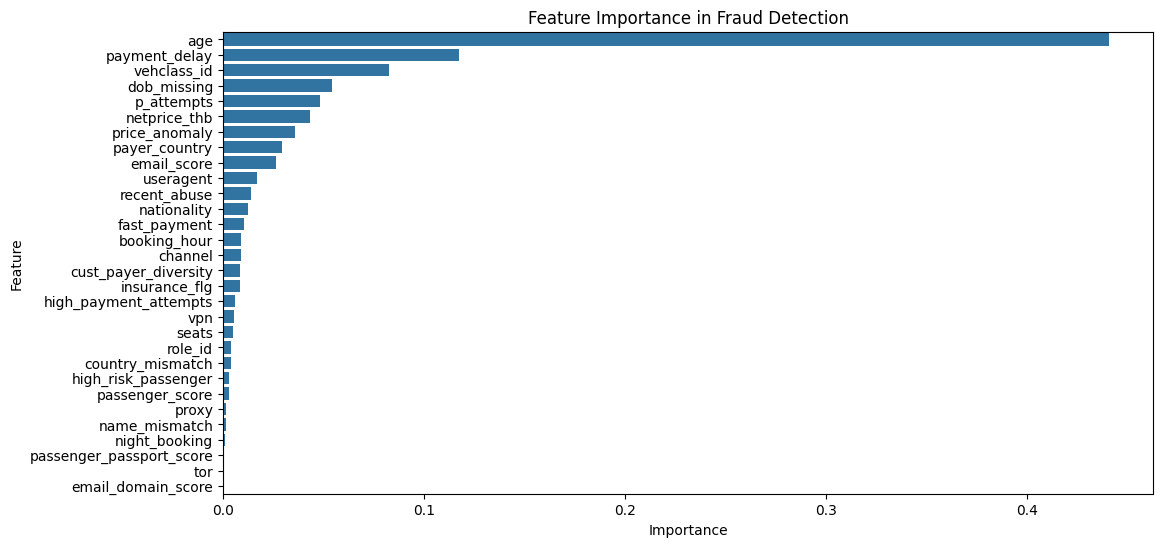

In [37]:
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"])
plt.title("Feature Importance in Fraud Detection")
plt.show()


From the graph above we see models that are of more importance to the model.
We can also see that features like tor, proxy, passenger_passport_score, name_mismatch etc. might not be necessarily be an indicator of fraud. However, age, payment_delay, payment attemps might be huge indicators.

### Conclusion

After model the data was explored and model built, we found some interesting points which are stated in the notebbook. The objectives were acheived. Some of the summarized findings are:
- Missing date of birth mght be an indicator of fraud
- Older people are more susceptiple to scammers
- Age is a big indicator of fraud
- Proxy, vpn and tor users might not necessarily be fraud users, they could just be users avoiding browser cookies or looking for cheaper models.
- There is some relationship between payment delay and attempts and fraud
- There is no correlation between proxy, vpn and tor users
- Payer and customer name mismatch does not necessarily mean fraud. This could be as a result of people paying for family member, group bookings, agent booking, etc.
- Payer country that are flagged as fraud are high pointers to fraud even though country mismatch isn't. This could also be as a result of the above.


Improvements:

After model evaluation, we can see a good f1 score, for just the baseline model this could be an indicator of a good feature engineering. 
- However to ensure that the model is not overfitted this model can be trained on lesser features (taking out the less important features)
- The model also takes some time to run, this could be due to the size of the data. An advanced and faster model could work better. 
- It can also be trained with advanced models such as neural networks, lightgbm or Xgboost to compare performance. 
- More hyperparameter tuning can be done to ensure the model is not overfitted.

Future work:

Once the model performance is satisfactory, we can create a pickle file for the model and deploy this to a test site where results are logged and monitored to see performance. Then based on the performance we can then retrain model or deploy to production.


In [1]:

import numpy as np


# Re-generate synthetic data for fraud detection (since execution state was reset)
num_samples = 1000
np.random.seed(42)

# Categorical variables
channels = ["direct", "organic", "affiliate", "referral", "paid"]
countries = ["US", "UK", "TH", "IN", "AU", "CA", "FR", "DE"]
roles = ["user", "admin"]
transport_types = ["bus", "train", "ferry", "avia", "van", "charter"]

# Generate random data
data = {
    "bid": np.arange(1, num_samples + 1),
    "channel": np.random.choice(channels, num_samples),
    "email_domain_score": np.random.uniform(0, 1, num_samples),
    "email_score": np.random.uniform(0, 10, num_samples),
    "insurance_flg": np.random.randint(0, 2, num_samples),
    "isFraud": np.random.choice([0, 1], num_samples, p=[0.95, 0.05]),  # 5% fraud rate
    "nationality": np.random.choice(countries, num_samples),
    "netprice_thb": np.random.uniform(100, 5000, num_samples),
    "p_attempts": np.random.randint(1, 5, num_samples),
    "passenger_score": np.random.uniform(0, 10, num_samples),
    "payer_country": np.random.choice(countries, num_samples),
    "role_id": np.random.choice(roles, num_samples),
    "seats": np.random.randint(1, 5, num_samples),
    "vehclass_id": np.random.choice(transport_types, num_samples),
}

# Convert to DataFrame
df_synthetic = pd.DataFrame(data)

# Encode categorical variables
categorical_cols = ["channel", "nationality", "payer_country", "role_id", "vehclass_id"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_synthetic[col] = le.fit_transform(df_synthetic[col])
    label_encoders[col] = le  # Store encoders for later use

# Step 1: Split Data into Features and Target
X = df_synthetic.drop(columns=["isFraud"])  # Features
y = df_synthetic["isFraud"]  # Target

# Step 2: Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Step 3: Generate Fresh Synthetic Data for Prediction
num_test_samples = 5  # Example test set size
test_data = X.sample(num_test_samples, random_state=42).copy()  # Selecting random test samples

# Step 4: Predict on Fresh Data
predictions = rf_model.predict(test_data)
test_data["Predicted_Fraud"] = predictions


# Output predictions
test_data


,bid,channel,email_domain_score,email_score,insurance_flg,nationality,netprice_thb,p_attempts,passenger_score,payer_country,role_id,seats,vehclass_id,Predicted_Fraud
521,522,1,0.731590,3.945761,0,3,4798.472179,2,9.325040,5,0,2,0,0
737,738,4,0.272624,0.143153,0,5,3995.556531,4,5.867679,1,0,2,2,1
740,741,2,0.181149,7.404761,1,1,813.025866,1,2.649671,2,1,2,0,1
660,661,3,0.689527,4.440437,0,7,1896.726511,4,5.407656,4,1,1,2,0
411,412,2,0.445903,8.583417,1,6,2229.201720,1,5.450834,0,1,3,2,0
